### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [5]:
df = pd.read_csv('data/winequality-red.csv', sep = ',')

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
X = df.drop('quality', axis = 1)
y = df['quality']

<Axes: >

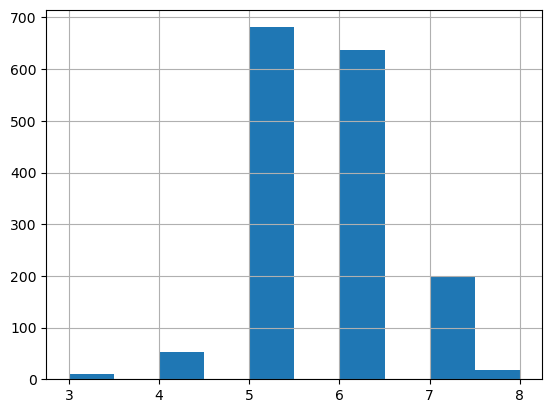

In [8]:
y.hist()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [23]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.utils import shuffle

MSE Ridge Train  0.42741884555047666
MSE Ridge Test  0.3883111064725568
    alcohol  sulphates  free sulfur dioxide  residual sugar  fixed acidity
0  0.302453   0.143569             0.051169        0.012674       0.037891


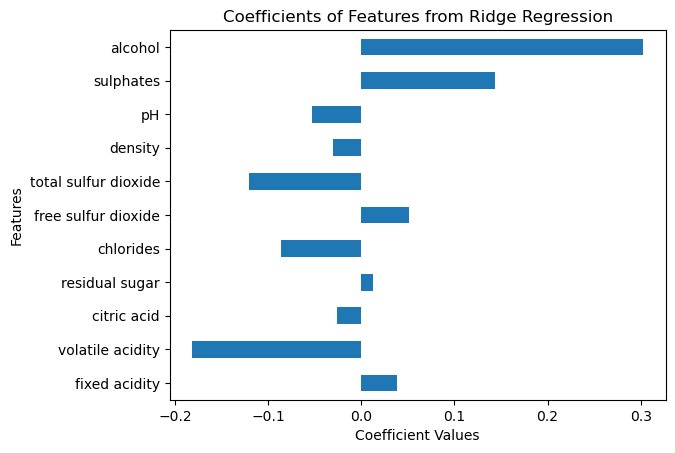

In [39]:
# Ridge regressor to extract coefficients
ridge_regressor_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

ridge_regressor_pipe.fit(X_train, y_train)

print("MSE Ridge Train ", mean_squared_error(ridge_regressor_pipe.predict(X_train), y_train))
print("MSE Ridge Test ", mean_squared_error(ridge_regressor_pipe.predict(X_test), y_test))

ridge_coef = pd.DataFrame([ridge_regressor_pipe.named_steps['ridge'].coef_], columns=ridge_regressor_pipe.named_steps['scaler'].get_feature_names_out())

# Note: If you want to plot just a single row, need to plot just the series

ridge_coef.iloc[0].plot.barh()
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title('Coefficients of Features from Ridge Regression')

print(ridge_coef[['alcohol', 'sulphates', 'free sulfur dioxide', 'residual sugar', 'fixed acidity']])

In [40]:
# SequentialFeatureSelection using the Lasso to select four features

selector = SequentialFeatureSelector(Lasso(), n_features_to_select=4)
best_features = selector.fit_transform(X_train, y_train)

pipe = Pipeline([('column_selector', selector),
                ('lassoreg', Lasso())])
pipe.fit(X_train, y_train)
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print("MSE Seq_Lasso Train ", train_mse)
print("MSE Seq_Lasso Test ", test_mse)

best_features_df = pd.DataFrame(best_features, columns = selector.get_feature_names_out())
best_features_df

MSE Seq_Lasso Train  0.6344527033514971
MSE Seq_Lasso Test  0.6150055162124933


,fixed acidity,volatile acidity,citric acid,total sulfur dioxide
0,11.7,0.490,0.49,15.0
1,8.8,0.600,0.29,15.0
2,7.1,0.590,0.00,14.0
3,8.3,0.540,0.24,112.0
4,9.3,0.775,0.27,56.0
...,...,...,...,...
1194,9.1,0.600,0.00,10.0
1195,8.2,0.635,0.10,60.0
1196,7.2,0.620,0.06,85.0
1197,7.9,0.200,0.35,15.0


In [41]:
# RFE using the Lasso to select four features

rfe = RFE(Lasso(), n_features_to_select=4)
best_features = rfe.fit_transform(X_train, y_train)

print("RFE Train ", mean_squared_error(rfe.predict(X_train), y_train))
print("RFE Test ", mean_squared_error(rfe.predict(X_test), y_test))

best_features_df = pd.DataFrame(best_features, columns = rfe.get_feature_names_out())
best_features_df

RFE Train  0.6344527033514971
RFE Test  0.6150055162124933


,total sulfur dioxide,pH,sulphates,alcohol
0,15.0,3.19,0.43,9.2
1,15.0,3.36,0.49,9.1
2,14.0,3.42,0.55,11.5
3,112.0,3.27,0.61,9.4
4,56.0,3.31,0.67,10.6
...,...,...,...,...
1194,10.0,3.18,0.63,10.4
1195,60.0,3.29,0.75,10.9
1196,85.0,3.51,0.54,9.5
1197,15.0,3.32,0.80,11.9
